In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('IMDBDataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

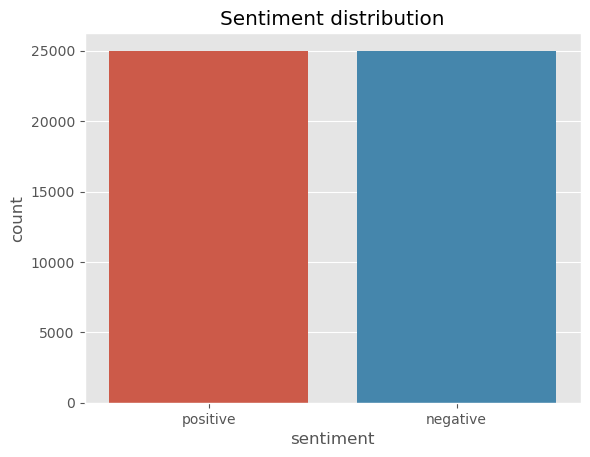

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [6]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")


Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [7]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [8]:
df['word count'] = df['review'].apply(no_of_words)

In [9]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

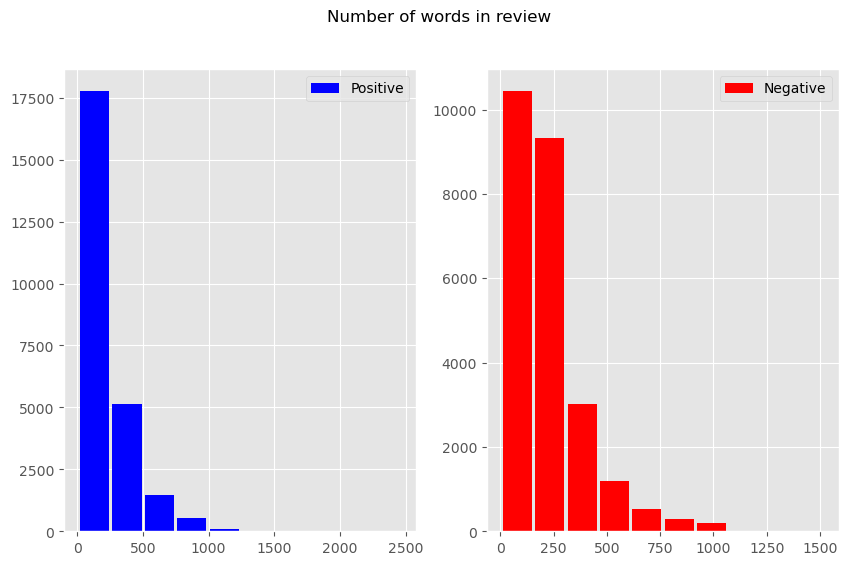

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

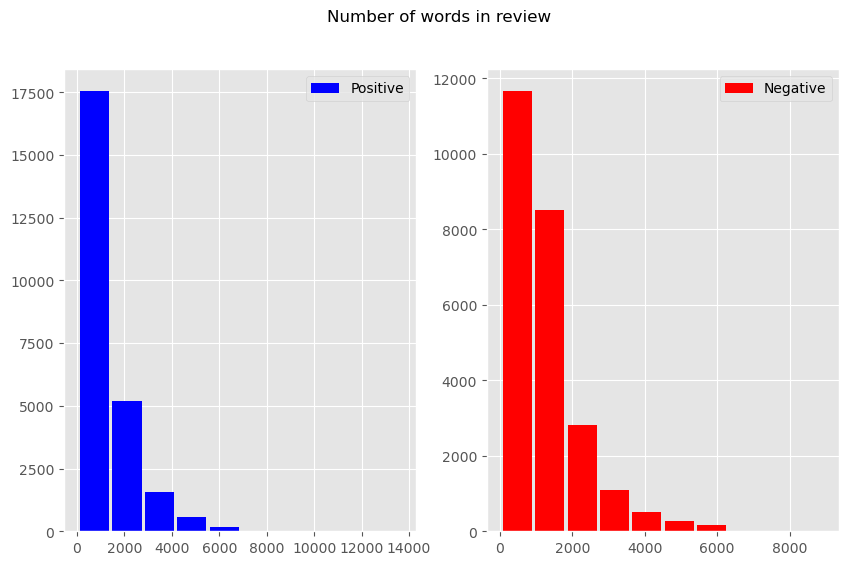

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [12]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)


In [13]:
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

In [14]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [15]:
df.review = df['review'].apply(data_processing)

In [16]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [17]:
df = df.drop_duplicates('review')

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [21]:
df.review = df['review'].apply(lambda x: stemming(x))

In [22]:
df['word count'] = df['review'].apply(no_of_words)
df.head()


review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125

In [23]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

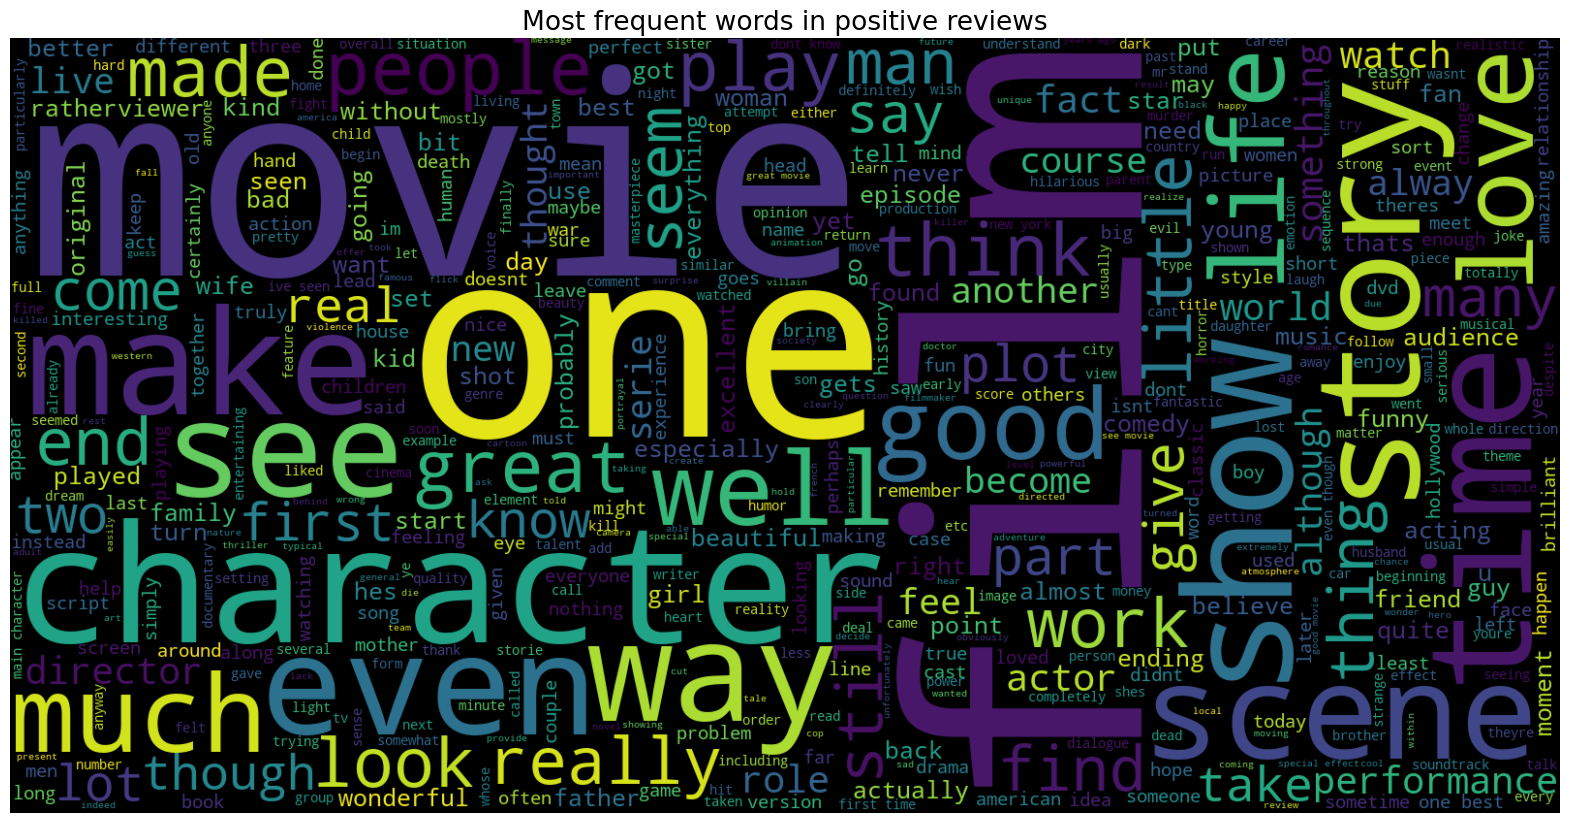

In [24]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [25]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [26]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [27]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [28]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

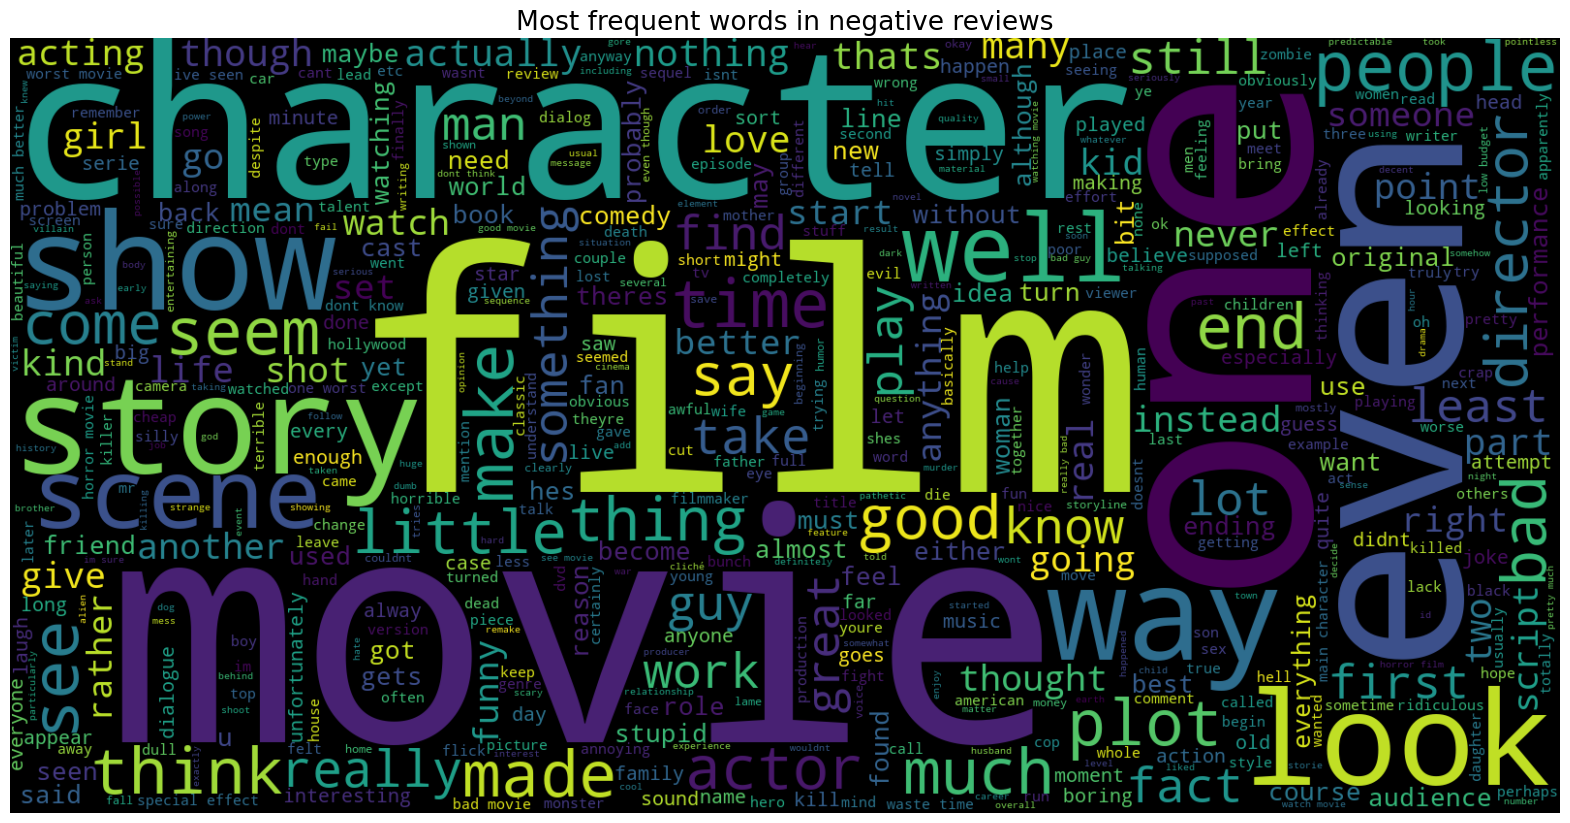

In [29]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [30]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [31]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()


word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [32]:

px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [33]:
X = df['review']
Y = df['sentiment']

In [34]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [36]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (29746, 221707)
Size of y_train:  (29746,)
Size of x_test:  (19832, 221707)
Size of y_test:  (19832,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [38]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.76%


In [39]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[9019  999]
 [1231 8583]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89     10018
           2       0.90      0.87      0.89      9814

    accuracy                           0.89     19832
   macro avg       0.89      0.89      0.89     19832
weighted avg       0.89      0.89      0.89     19832



Text(8.222222222222223, 0.5, 'Actual values')

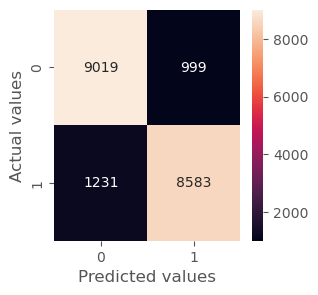

In [40]:
%matplotlib inline
cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True ,fmt="d")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [41]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.39%


In [42]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[8531 1487]
 [1212 8602]]


              precision    recall  f1-score   support

           1       0.88      0.85      0.86     10018
           2       0.85      0.88      0.86      9814

    accuracy                           0.86     19832
   macro avg       0.86      0.86      0.86     19832
weighted avg       0.86      0.86      0.86     19832



Text(8.222222222222223, 0.5, 'Actual values')

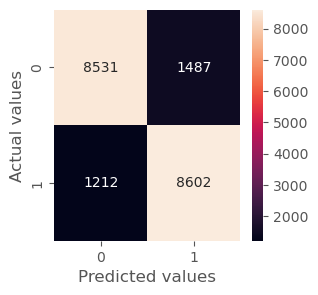

In [43]:
%matplotlib inline
cm = confusion_matrix(y_test, mnb_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True ,fmt="d")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
# print the test accuracy
print("Test accuracy: {:.2f}%".format(dt_acc*100))

Test accuracy: 65.17%


Text(8.222222222222223, 0.5, 'Actual values')

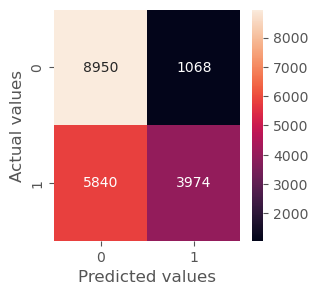

In [45]:
%matplotlib inline
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True ,fmt="d")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

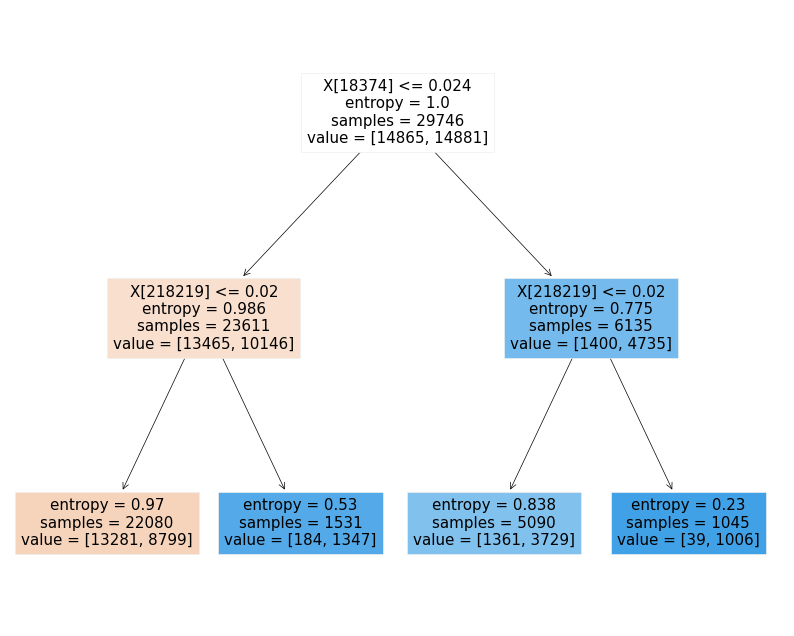

In [46]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# import matplotlib.pyplot as plt

from sklearn import tree

plt.figure(figsize=(10, 8))
tree.plot_tree(dt,filled=True);

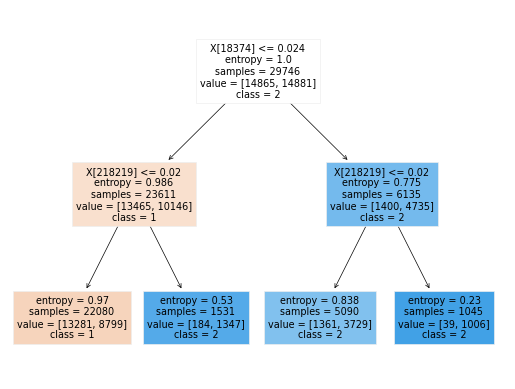

<Figure size 1000x800 with 0 Axes>

In [47]:
# plot the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(dt, class_names=['1', '2'], filled=True)
plt.figure(figsize=(10, 8))
plt.show()

In [48]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.02%


Text(8.222222222222223, 0.5, 'Actual values')

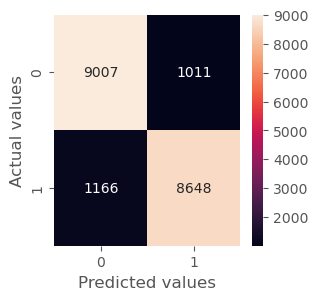

In [49]:
%matplotlib inline
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True ,fmt="d")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier instance
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rfc.fit(x_train, y_train)

# Make predictions on the testing set
rfc_pred = rfc.predict(x_test)
# Compute the accuracy of the classifier
rfc_acc = accuracy_score(rfc_pred, y_test)

# Print the test accuracy
print("Test accuracy: {:.2f}%".format(rfc_acc * 100))

Test accuracy: 84.84%


Text(8.222222222222223, 0.5, 'Actual values')

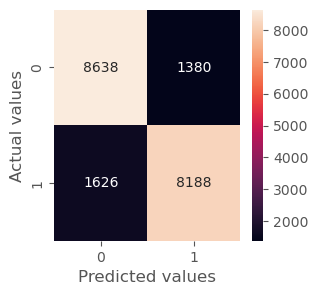

In [51]:
%matplotlib inline
cm = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True ,fmt="d")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [52]:
print(svc.predict(vect.transform(['I am very happy'])))
print(svc.predict(vect.transform(['The movie was good'])))
print(svc.predict(vect.transform(['I did not like this movie at all I gave this movie away'])))
print(svc.predict(vect.transform(['Who needs a good script,talented actors,or believable special effect when you have a bunch of sharks flying around in a tornado'])))

[1]
[1]
[2]
[1]


In [77]:
print(dt.predict(vect.transform(['This movie is an epitome of a train wreck'])))
print(dt.predict(vect.transform(['The movie was good'])))
print(dt.predict(vect.transform(['I did not like this movie at all I gave this movie away'])))
print(dt.predict(vect.transform(['Who needs a good script,talented actors,or believable special effect when you have a bunch of sharks flying around in a tornado'])))

[1]
[1]
[1]
[1]


In [78]:
print(rfc.predict(vect.transform(['This movie is an epitome of a train wreck'])))
print(rfc.predict(vect.transform(['The movie was good'])))
print(rfc.predict(vect.transform(['I did not like this movie at all I gave this movie away'])))
print(rfc.predict(vect.transform(['Who needs a good script,talented actors,or believable special effect when you have a bunch of sharks flying around in a tornado'])))

[1]
[1]
[1]
[2]


In [79]:
print(mnb.predict(vect.transform(['This movie is an epitome of a train wreck'])))
print(mnb.predict(vect.transform(['The movie was good'])))
print(mnb.predict(vect.transform(['I did not like this movie at all I gave this movie away'])))
print(mnb.predict(vect.transform(['Who needs a good script,talented actors,or believable special effect when you have a bunch of sharks flying around in a tornado'])))

[2]
[2]
[2]
[2]


In [80]:
print(x_train)

  (0, 3026)	0.23460669997328434
  (0, 3154)	0.22511278997096143
  (0, 163733)	0.20418416675843715
  (0, 81886)	0.16607749751459977
  (0, 84149)	0.16873107316752436
  (0, 3078)	0.1486256288997617
  (0, 3383)	0.13753390521772282
  (0, 33881)	0.15862094699352075
  (0, 175059)	0.16153136101443902
  (0, 16452)	0.1036363315707366
  (0, 51582)	0.1890434802083679
  (0, 107457)	0.13446914822841094
  (0, 205521)	0.13340947133154
  (0, 60903)	0.12941836152397324
  (0, 151665)	0.13185625870754827
  (0, 128588)	0.39823661280607314
  (0, 194471)	0.12015860210402038
  (0, 215660)	0.181835921772888
  (0, 110973)	0.09896407933733258
  (0, 63870)	0.1058433263014195
  (0, 160177)	0.08733387087823591
  (0, 196716)	0.12593409100396952
  (0, 63672)	0.14872505521947704
  (0, 203588)	0.06255308848389746
  (0, 190137)	0.2201672966274044
  :	:
  (29745, 112092)	0.09577678849572764
  (29745, 45987)	0.09245903598520193
  (29745, 30033)	0.1734540043837156
  (29745, 89661)	0.08010800267602487
  (29745, 37915)	0.078

In [81]:
print(y_train)

4805     1
3517     1
35994    2
43373    1
40568    1
        ..
11304    2
45063    1
38407    2
860      1
15838    1
Name: sentiment, Length: 29746, dtype: int64
